In [1]:
import pandas as pd
import requests
from pprint import pprint
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
df = pd.read_csv ('../cy/large_cities.csv')

df = df.drop(['lng','lat'], axis = 1)

In [2]:
all_salaries = pd.read_csv ('../cy/salries.csv')
all_salaries.head()

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,16.41,24.82,36.23,"18,990","23,710","34,130","51,620","75,370",NaN,NaN
1,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,36.37,51.68,73.88,"36,150","55,620","75,640","107,500","153,670",NaN,NaN
2,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-1021,General and Operations Managers,...,32.96,50.11,72.93,"26,350","49,960","68,550","104,230","151,700",NaN,NaN
3,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-2022,Sales Managers,...,52.41,68.01,#,"54,560","74,680","109,000","141,460",#,NaN,NaN
4,10180,"Abilene, TX",4,TX,0,Cross-industry,cross-industry,1235,11-2030,Public Relations and Fundraising Managers,...,36.24,41.23,83.81,"59,710","68,180","75,380","85,760","174,320",NaN,NaN


In [4]:
def get_values(argument):   

    salaries = all_salaries[['AREA_TITLE',argument]]

    salaries[argument]=salaries[argument].str.replace(',','')

    salaries[argument] = salaries[argument].apply(pd.to_numeric,errors='coerce')

    salaries = salaries.groupby('AREA_TITLE').mean()

    iteration = 0


    cities = []
    dictionary = {}

    data_df = pd.DataFrame()
    for index in df.iterrows():
        search_for = (df['city'][iteration]).lower()
        search_for = search_for.replace('-',' ')
        search_for_state = (df['state'][iteration])
        iteration+=1
        for index, row in salaries.iterrows():
            city_name = index.split(", ")
            city_name = city_name[0].lower()
            state = index
            if search_for in city_name:
                    if search_for_state in index:
                        dictionary[search_for] = (row[0])
            elif search_for[5:] or search_for[:5] in city_name:
                if search_for_state in index:
                        dictionary[search_for] = (row[0])

    iteration = 0

    for index,row in df.iterrows():
        try:
            x = (df['city'][iteration]).lower()

            df.loc[iteration,str(argument)] = dictionary[x]
            iteration+=1
        except:
            KeyError
            iteration+=1
                        
                        
                        
                        
get_values('A_MEDIAN')
get_values('A_PCT10')
get_values('A_PCT90')

df

/Users/cy/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/cy/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Unnamed: 0,city,state,population,A_MEDIAN,A_PCT10,A_PCT90
0,16729,Anchorage,AK,298695.0,60826.105263,40507.789474,88043.121693
1,16730,Birmingham,AL,212461.0,48194.829721,32055.617284,70974.057508
2,16731,Little Rock,AR,197992.0,44928.143460,30550.126050,67166.837607
3,16732,Phoenix,AZ,1563025.0,48319.163180,33883.833333,72339.495798
4,16733,Los Angeles,CA,3971883.0,56503.028846,39971.809524,82383.960396
5,16734,Denver,CO,682545.0,52623.976378,36671.686275,75782.128514
6,16735,Bridgeport,CT,147629.0,59785.053079,41283.642105,88184.188596
7,16736,Washington,DC,601723.0,67276.590258,41964.065156,96646.983155
8,16737,Wilmington,DE,71948.0,51671.625000,35568.564356,75817.943445
9,16738,Jacksonville,FL,868031.0,44267.848101,31941.490683,67990.194805


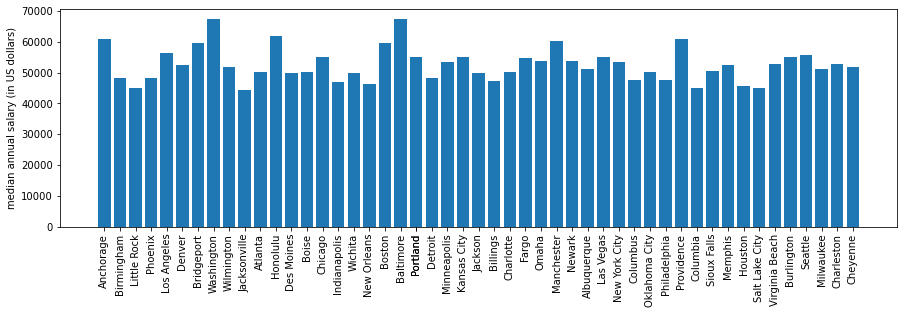

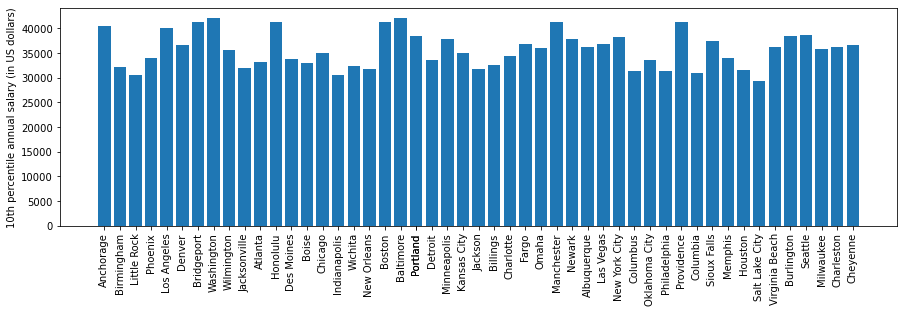

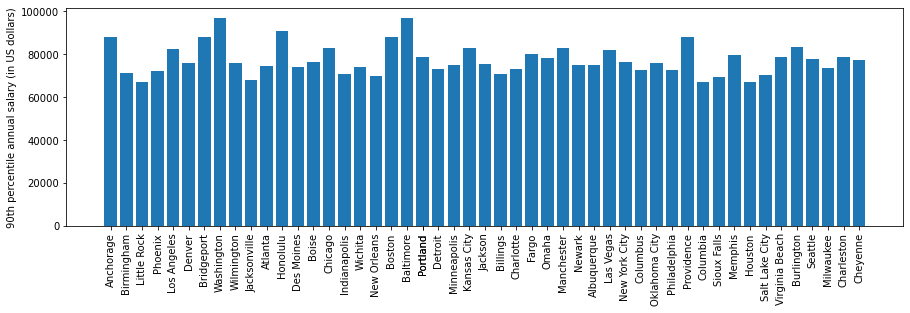

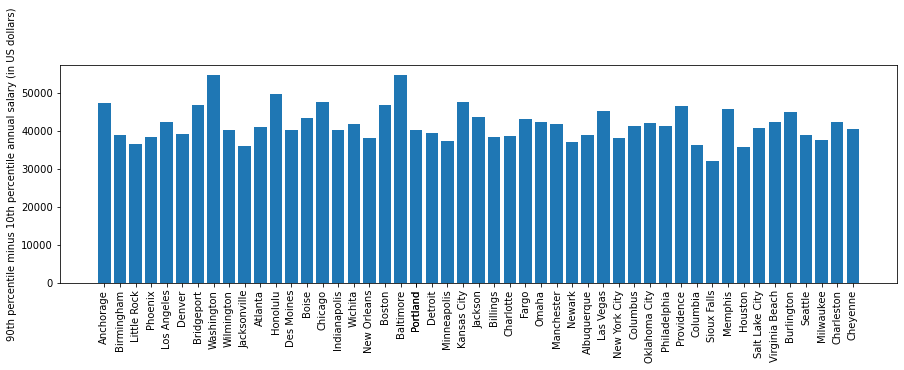

In [5]:
df = df.dropna()

def bar(y, label):
    plt.bar(df['city'],y)
    
    plt.xticks(df['city'],rotation = 'vertical')
    plt.gcf().set_size_inches(15, plt.gcf().get_size_inches()[1])
    plt.ylabel(label + " annual salary (in US dollars)")
    plt.show()

bar(df['A_MEDIAN'], 'median')
bar(df['A_PCT10'], '10th percentile')
bar(df['A_PCT90'], '90th percentile')
bar(df['A_PCT90'] - df['A_PCT10'], '90th percentile minus 10th percentile')

correlation coefficient = 0.004024690983860783


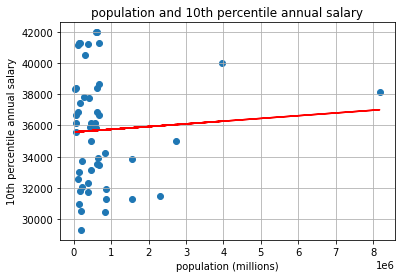

In [6]:
def visualize(x,y,xlabel,ylabel, title):
    plt.scatter(x,y)

    slope, intercept, r, p, std_err = stats.linregress(x, y)
    regression_values = slope * x + intercept
    plt.plot(x, regression_values, '-r')
    
    plt.xlabel(xlabel)

    plt.ylabel(ylabel)
    plt.title(title)

    plt.grid(True)
    print(f'correlation coefficient = {r**2}')
    
visualize(df['population'],df['A_PCT10'],'population (millions)',
          '10th percentile annual salary','population and 10th percentile annual salary' )



correlation coefficient = 0.0004486369889479046


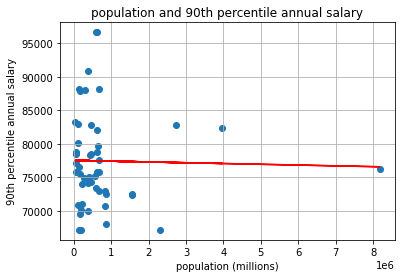

In [7]:
visualize(df['population'],df['A_PCT90'],'population (millions)','90th percentile annual salary'
          ,'population and 90th percentile annual salary' )

correlation coefficient = 0.006804088237781093


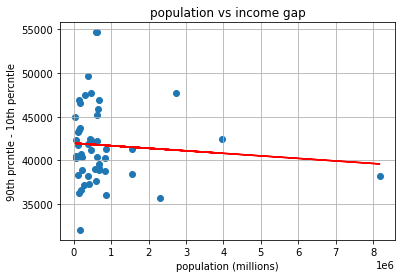

In [8]:
visualize(df['population'], df['A_PCT90'] - df['A_PCT10'], 'population (millions)', 
          '90th prcntle - 10th percntle', 'population vs income gap')

correlation coefficient = 0.700736998634241


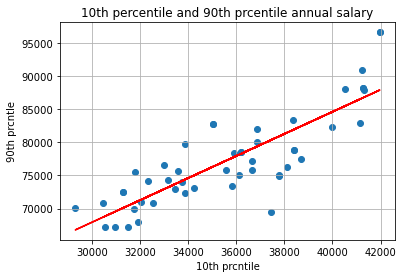

In [9]:
visualize(df['A_PCT10'], df['A_PCT90'], '10th prcntile', 
          '90th prcntle', '10th percentile and 90th prcentile annual salary')

In [ ]:
total_score = pd.read_csv ('../kali/CityScoresOriginal.csv')



for index, row in df.iterrows():
    city = df.loc[index,'city']
    for index, row in total_score.iterrows():
        good_city = row['City']
        if city.lower() == good_city.lower():
            df['Teleport total score'] = total_score['Total Score']
            



In [34]:
total_score = pd.read_csv ('../kali/CityScoresOriginal.csv')



for index, row in df.iterrows():
    city = df.loc[index,'city']
    for index, row in total_score.iterrows():
        good_city = row['City']
        if city.lower() == good_city.lower():
            total_score['median salary'] = df['A_MEDIAN']


add_salary(total_score)
# with_data = total_score.dropna()

# plt.scatter(with_data['Total Score'], with_data['average salary'])
total_score

,Unnamed: 0,City,State,Country,Population,Latitude,Longitude,Housing,Cost of Living,Travel Connectivity,Commute,Education,Total Score,average salary
0,0,Anchorage,AK,US,298695,61.21806,-149.90028,5.4335,3.141,1.7380,4.71525,3.6245,18.65225,88043.121693
1,1,Birmingham,AL,US,212461,33.52066,-86.80249,6.5555,5.133,1.4355,2.02075,3.6245,18.76925,70974.057508
2,2,Phoenix,AZ,US,1563025,33.44838,-112.07404,6.5330,6.208,3.3025,4.82850,4.5910,25.46300,67166.837607
3,3,Los Angeles,CA,US,3971883,34.05223,-118.24368,1.5275,4.556,3.9585,3.67700,8.6245,22.34350,72339.495798
4,4,Denver,CO,US,682545,39.73915,-104.98470,3.8375,5.102,4.2430,4.53000,3.6245,21.33700,82383.960396
5,5,Washington,DC,US,601723,38.89511,-77.03637,1.2105,3.595,4.5050,4.45700,5.9685,19.73600,75782.128514
6,6,Jacksonville,FL,US,868031,30.33218,-81.65565,6.4500,5.359,1.5675,1.40575,3.6245,18.40675,88184.188596
7,7,Atlanta,GA,US,463878,33.74900,-84.38798,4.9755,5.241,5.2915,3.89775,6.4570,25.86275,96646.983155
8,8,Honolulu,HI,US,371657,21.30694,-157.85833,2.3415,2.867,1.9830,4.16175,4.2805,15.63375,75817.943445
9,9,Des Moines,IA,US,210330,41.60054,-93.60911,6.8510,6.327,1.3790,2.07225,3.6245,20.25375,67990.194805


In [40]:
alls = pd.read_csv ('../Share/largest_cities_df.csv')

alls = alls.drop(['Teleport Economy Score'], axis = 1)

alls.to_csv('../Share/largest_cities_df.csv')